In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from root_pandas import read_root
%run functions.ipynb
%run constants.ipynb

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
Welcome to JupyROOT 6.14/06


In [2]:
def getData(inputFiles):
    cols = []
    scalar = []
    scalar.append('evid')
    scalar.append('xsec')
    scalar.append('ntrials')    
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    scalar.append('W2')
    scalar.append('pt_jet')
    scalar.append('eta_jet')
    scalar.append('phi_jet')
    scalar.append('pt_jet_g')
    scalar.append('phi_jet_g')
    scalar.append('pt_quark')
    scalar.append('eta_quark')
    scalar.append('phi_quark')
    scalar.append('pt_photon')
    scalar.append('phi_photon')
    scalar.append('eta_electron')
    scalar.append('pt_electron')
    scalar.append('zg')
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [3]:
files = ["$HOME/EIC/output/102.root"]
a = getData(files)


Processed $HOME/EIC/output/102.root in 114.6 seconds


In [4]:
files = ["$HOME/EIC/output/1010.root"]
b = getData(files)


Processed $HOME/EIC/output/1010.root in 112.3 seconds


In [5]:
# general cuts
d = applyCut(a, 'pt_electron > 4', 'pt_electron > 4')
d = applyCut(d, 'pt_jet > 4', 'pt_jet > 4')
d = applyCut(d, 'y > 0.1 and y < 0.85', '0.1 < y < 0.85')
d = applyCut(d, 'W2 > 4', 'W2 > 4')

pt_electron > 4 1548370  fraction kept: 4.3
pt_jet > 4 304784  fraction kept: 19.7
0.1 < y < 0.85 134309  fraction kept: 44.1
W2 > 4 134309  fraction kept: 100.0


In [6]:
d = fixPhi(d, 'photon')

Fixed photon phi range
Fixed photon delta phi range


In [7]:
d.eval('nu = 0.533*Q2/x',inplace=True)

In [8]:
# general cuts
e = applyCut(b, 'pt_electron > 4', 'pt_electron > 4')
e = applyCut(e, 'pt_jet > 4', 'pt_jet > 4')
e = applyCut(e, 'y > 0.1 and y < 0.85', '0.1 < y < 0.85')
e = applyCut(e, 'W2 > 4', 'W2 > 4')

pt_electron > 4 1582409  fraction kept: 4.3
pt_jet > 4 314774  fraction kept: 19.9
0.1 < y < 0.85 137923  fraction kept: 43.8
W2 > 4 137923  fraction kept: 100.0


In [9]:
e = fixPhi(e, 'photon')

Fixed photon phi range
Fixed photon delta phi range


In [10]:
e.eval('nu = 0.533*Q2/x',inplace=True)

In [11]:
d1 = applyCut(d, '5 < pt_electron < 10', '5 < pt_electron < 10')
d2 = applyCut(d, '10 < pt_electron < 20', '10 < pt_electron < 20')
d3 = applyCut(d, '20 < pt_electron < 35', '20 < pt_electron < 35')
e1 = applyCut(e, '5 < pt_electron < 10', '5 < pt_electron < 10')
e2 = applyCut(e, '10 < pt_electron < 20', '10 < pt_electron < 20')
e3 = applyCut(e, '20 < pt_electron < 35', '20 < pt_electron < 35')

5 < pt_electron < 10 78713  fraction kept: 58.6
10 < pt_electron < 20 15811  fraction kept: 11.8
20 < pt_electron < 35 1013  fraction kept: 0.8
5 < pt_electron < 10 79951  fraction kept: 58.0
10 < pt_electron < 20 15915  fraction kept: 11.5
20 < pt_electron < 35 1018  fraction kept: 0.7


In [12]:
print np.mean(keepOneJet(d1)['x']), np.mean(keepOneJet(d2)['x']), np.mean(keepOneJet(d3)['x'])


Remove extra jets 73023  fraction kept: 92.8
0.037590083 
Remove extra jets 14667  fraction kept: 92.8
0.13427483 
Remove extra jets 967  fraction kept: 95.5
0.35037613


In [13]:
print np.mean(keepOneJet(e1)['x']), np.mean(keepOneJet(e2)['x']), np.mean(keepOneJet(e3)['x'])


Remove extra jets 73800  fraction kept: 92.3
0.037456285 
Remove extra jets 14667  fraction kept: 92.2
0.13427483 
Remove extra jets 967  fraction kept: 95.0
0.35037613


In [14]:
print np.mean(keepOneJet(d1)['nu']), np.mean(keepOneJet(d2)['nu']), np.mean(keepOneJet(d3)['nu'])


Remove extra jets 73023  fraction kept: 92.8
1150.2709 
Remove extra jets 14667  fraction kept: 92.8
1177.8379 
Remove extra jets 967  fraction kept: 95.5
1471.6824


In [15]:
print np.mean(keepOneJet(e1)['nu']), np.mean(keepOneJet(e2)['nu']), np.mean(keepOneJet(e3)['nu'])


Remove extra jets 73800  fraction kept: 92.3
1150.7997 
Remove extra jets 14667  fraction kept: 92.2
1177.8379 
Remove extra jets 967  fraction kept: 95.0
1471.6824


In [16]:
def plot_dphi(df_array, label_array, color_array):
    for i in range(0,len(df_array)):
        fig = plt.hist(df_array[i]['delta_phi_photon_abs'], label=label_array[i], range=(0,0.5), bins=25, histtype='step', fill=True, alpha=0.5, stacked=True, normed=True, color=color_array[i], linewidth=2)
    return fig

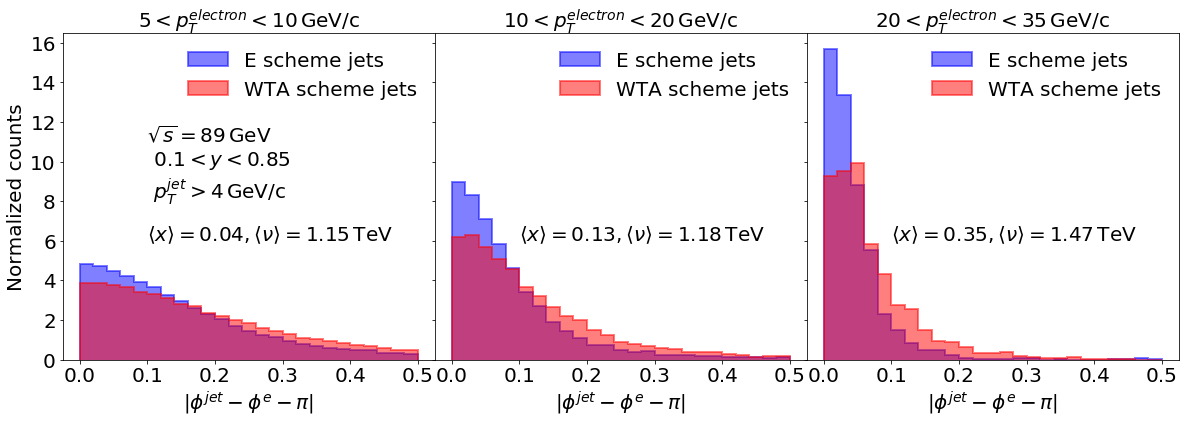

In [19]:
fig = plt.figure(figsize=(20,6))
plt.subplots_adjust(wspace=0, hspace=0)

ax1 = plt.subplot(131)
plot_dphi([d1,e1], ['E scheme jets','WTA scheme jets'], ['b','r'])
plt.xlabel('$|\phi^{jet}-\phi^e-\pi|$', fontsize=20)
plt.ylabel('Normalized counts', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.text(0.1,6, r'$\langle x \rangle = 0.04, \langle \nu \rangle = 1.15 \, \mathrm{TeV}$', fontsize=20)
plt.text(0.1,8, '$\sqrt{s} = 89 \, \mathrm{GeV}$ \n $0.1 < y < 0.85$ \n $p_T^{jet} > 4 \, \mathrm{GeV/c}$', fontsize=20)
plt.legend(prop={'size': 20}, frameon=False, loc='best')
plt.title('$5 < p_T^{electron} < 10 \, \mathrm{GeV/c}$', fontsize=20)

ax2 = plt.subplot(132, sharey=ax1)
plot_dphi([d2,e2], ['E scheme jets','WTA scheme jets'], ['b','r'])
plt.xlabel('$|\phi^{jet}-\phi^e-\pi|$', fontsize=20)
plt.xticks(fontsize=20)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.text(0.1,6, r'$\langle x \rangle = 0.13, \langle \nu \rangle = 1.18 \, \mathrm{TeV}$', fontsize=20)
plt.legend(prop={'size': 20}, frameon=False, loc='best')
plt.title('$10 < p_T^{electron} < 20 \, \mathrm{GeV/c}$', fontsize=20)

ax3 = plt.subplot(133, sharey=ax1)
plot_dphi([d3,e3], ['E scheme jets','WTA scheme jets'], ['b','r'])
plt.xlabel('$|\phi^{jet}-\phi^e-\pi|$', fontsize=20)
plt.xticks(fontsize=20)
plt.setp(ax3.get_yticklabels(), visible=False)
plt.text(0.1,6, r'$\langle x \rangle = 0.35, \langle \nu \rangle = 1.47 \, \mathrm{TeV}$', fontsize=20)
plt.legend(prop={'size': 20}, frameon=False, loc='best')
plt.title('$20 < p_T^{electron} < 35 \, \mathrm{GeV/c}$', fontsize=20)

plt.savefig('images/dphi_2.pdf', bbox_inches='tight')